<a href="https://colab.research.google.com/github/chendydeaandriany/RFM-Analysis-of-Gustavo-s-e-commerce/blob/main/RFM_Analysis_of_Gustavo's_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Assignment 

# Data Description

## Objective
Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.

The data can be accessed here

I. [order_dataset](https://drive.google.com/file/d/1gpaHucp2CXrFefhb3iBVZZxHY4bpE6ZX/view?usp=sharing)

II. [customer_dataset](https://drive.google.com/file/d/1AYksizrY0h2Ozhnve2O-Jidci9R_fJFr/view?usp=sharing)

III. [order_payment_datset](https://drive.google.com/file/d/1VYfORqNcLo_nbpRB5Bo5ZeERq-Ky_TQG/view?usp=sharing)



## Data Cleaning
**Cleaning the data consist of:** 
1.   Removing irrelevant values
2.   Handling missing values
3.   Removing duplicate values
4.   Handling outliers
5.   Converting data types
  *   string: if there are typos or abnormal string data, it needs to be transformed
  *   timeseries: time series column is read as time series (not string)
6.   Combine the dataset into single dataset



##EDA
**Exploratory data analysis (EDA) consist of:** 

1.   Evaluate the descriptive statistics. What can we understand about the data? provide the *insight*
2.   Visualize the order dataset and check if there is some pattern on the time-series data, provide the *insight*
  *   Number of orders per month
  *   Daily orders trend (which day of week is the busiest)
  *   Percentage of orders per payment type

**Please provide your insight beside the 3 points above.**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# Import Dataset

In [ ]:
#import order dataset
sheet_url = 'https://drive.google.com/file/d/1gpaHucp2CXrFefhb3iBVZZxHY4bpE6ZX/view?usp=sharing'
sheet_url = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
df_order = pd.read_csv(sheet_url)
df_order 

In [ ]:
df_order.info()

In [ ]:
#import customer dataset
sheet_url = 'https://drive.google.com/file/d/1AYksizrY0h2Ozhnve2O-Jidci9R_fJFr/view?usp=sharing'
sheet_url = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
df_customers = pd.read_csv(sheet_url)
df_customers

In [ ]:
df_customers.info()

In [ ]:
# import order payments dataset
sheet_url = 'https://drive.google.com/file/d/1VYfORqNcLo_nbpRB5Bo5ZeERq-Ky_TQG/view?usp=sharing'
sheet_url = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
df_order_payments = pd.read_csv(sheet_url)
df_order_payments

In [ ]:
df_order_payments.info()

# Data Cleaning & Preparation

## Order Dataset

In [ ]:
#to get the first n rows
df_order.head()

It shows the data frame by showing the top 5 rows. It can be seen that the data to be cleaned has 8 columns.

In [ ]:
#It displays detailed information about the dataframe, 
#such as the number of rows of data, the names of the columns, 
#along with the amount of data and its data type.
df_order.info()

In [ ]:
#to find out the dimensions of the dataframe or the size of its rows and columns.
df_order.shape

The dataset has 99441 rows and 8 columns.

In [ ]:
#Display the names of columns in a dataframe.
df_order.columns

### Remove Irrelevant Values

In [ ]:
#Remove order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date because we don't need it in analysis.
list_columns = df_order.columns.to_list()
drop_columns = list_columns[4:8]
df_order.drop(columns=drop_columns,inplace=True)
df_order

In [ ]:
#After removing columns order_approved_at, order_delivered_carrier_date,order_delivered_customer_date
df_order.columns

### Handling Missing Values

In [ ]:
missing_value = df_order.isnull().sum()
missing_value

This dataset contains no missing values.

In [ ]:
print(df_order['order_status'].unique())

In [ ]:
#We will only analyze order status that is delivered.
df_order = df_order[~df_order['order_status'].isin(['invoiced','shipped','processing','unavailable','canceled',
 'created','approved'])]
df_order

In [ ]:
df_order['order_status'].value_counts()

Order status now only has a delivered status.

### Checking Typos

In [ ]:
for i in df_order.columns:
  unique_data = df_order[i].value_counts()
  print(unique_data,'\n')

### Removing Duplicate Values

In [ ]:
df_order.duplicated().sum()

This dataset contains no duplicated values.

we will check duplicate rows, by checking order_id which should be unique value for each rows.

In [ ]:
df_order['order_id'].duplicated().sum()

This column has a unique value for each row.

### Handling Outlier

No numeric column that can be checked for outliers.

### Converting Data Types

In [ ]:
#order_purchase_timestamp and order_estimated_delivery_date should be converted from object to datatime.
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order.head()

### Clean Data

In [ ]:
df_order_clean = df_order.copy()
df_order_clean.head()

## Customer Dataset

### Remove Irrelevant Values

In [ ]:
df_customers.columns

Column customer_city and customer_zip_code_prefix have same meaning (each zip code already represents one city only), So we should drop one of these two columns.

In [ ]:
df_customers1=df_customers.copy()
df_customers1.drop('customer_zip_code_prefix',axis=1,inplace=True)

In [ ]:
df_customers1.columns

### Handling Missing Value

In [ ]:
missing_value = df_customers1.isnull().sum()
missing_value

This dataset contains no missing values.

### Checking Typos

In [ ]:
for i in df_customers1.columns:
  unique_data = df_customers1[i].value_counts()
  print(unique_data,'\n')

### Removing Duplicate Values

In [ ]:
df_customers1.duplicated().sum()

This dataset contains no duplicated values.



we will check duplicate rows, by checking customer_id which should be unique value for each rows.

In [ ]:
df_customers1['customer_id'].duplicated().sum()

### Handling Outlier

No numeric column that can be checked for outliers.

### Converting Data Types

No data that can be converted.

In [ ]:
# Clean data
df_customers_clean = df_customers1.copy()
df_customers_clean.head()

## Order Payments Dataset

### Remove Irrelevant Values

In [ ]:
print(df_order_payments['payment_type'].unique())
df_order_payments[df_order_payments['payment_type'] =='not_defined']

There are only 3 rows where the payment type is not defined. We can remove them.

In [ ]:
df_order_payments1 = df_order_payments[~df_order_payments['payment_type'].isin(['not_defined'])]
df_order_payments1

### Handling Missing Values

In [ ]:
missing_value = df_order_payments1.isnull().sum()
missing_value

This dataset contains no missing values.

### Checking Typos

In [ ]:
for i in df_order_payments1.columns:
  unique_data = df_order_payments1[i].value_counts()
  print(unique_data,'\n')

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
f22592e01ddc0711e6794f900fa5e787     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99437, dtype: int64 

1     99357
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64 

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64 

1     52543
2    

### Removing Duplicate Values

In [ ]:
df_order_payments1.duplicated().sum()

0

This dataset contains no duplicated values.

In [ ]:
df_order_payments1['order_id'].duplicated().sum()

4446

we will remove duplicate rows, by checking order_id which should be unique value for each rows.

In [ ]:
df_order_payments2 = df_order_payments1.copy()
df_order_payments2 = df_order_payments2.drop_duplicates(subset=['order_id'])

In [ ]:
print("Lenght before remove duplicates: ", len(df_order_payments1))
print("Lenght after remove duplicates: ", len(df_order_payments2))

Lenght before remove duplicates:  103883
Lenght after remove duplicates:  99437


In [ ]:
 df_order_payments2[df_order_payments2['payment_installments'] != 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Handling Outlier

#### Univariate Outliers

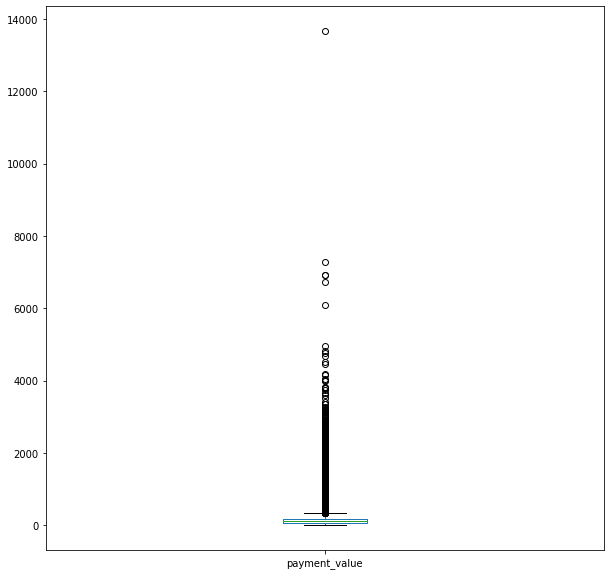

In [ ]:
df_order_payments2.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=True)

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(df_order_payments2['payment_value'])
df_order_payments2[(df_order_payments2['payment_value'] < lowerbound) | (df_order_payments2['payment_value'] > upperbound)].index

Int64Index([    23,     26,     52,     54,     61,     73,     74,    147,
               157,    159,
            ...
            103733, 103756, 103783, 103792, 103813, 103814, 103843, 103861,
            103881, 103884],
           dtype='int64', length=7770)

In terms of payment value, there are 7770 or 7.8 percent outliers. The payment value has a lot of outliers (the tolerance for outliers is 5 percent ). Either the outlier needs to be eliminated, maintained outlier or data transformation is required. 

I decided to delete some of the outliers that are > 6000 (Have a look at the boxplot that is far away from upperbound) as my outlier treatment. I don't want to lose any crucial information from this data, after all.

In [ ]:
df_order_payments3 = df_order_payments2[(df_order_payments2['payment_value']<6000)]

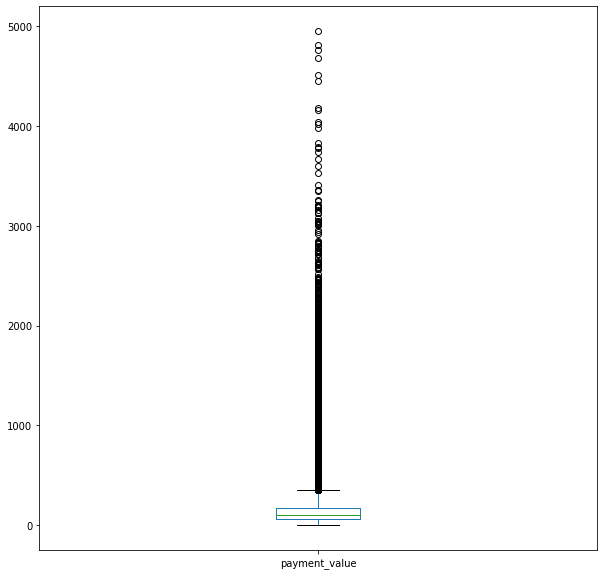

In [ ]:
df_order_payments3.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=True)

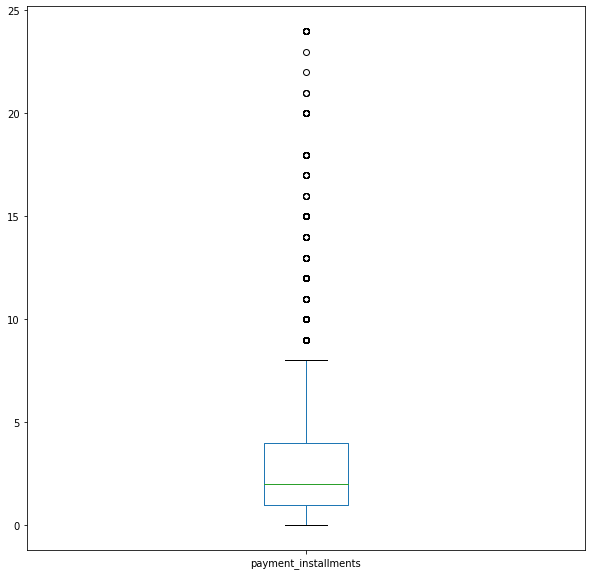

In [ ]:
df_order_payments3.boxplot(column=['payment_installments'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(df_order_payments3['payment_installments'])
df_order_payments3[(df_order_payments3['payment_installments'] < lowerbound) | (df_order_payments3['payment_installments'] > upperbound)].index

Int64Index([    15,     23,     87,     95,    112,    132,    150,    159,
               160,    165,
            ...
            103759, 103783, 103792, 103793, 103805, 103814, 103834, 103842,
            103864, 103875],
           dtype='int64', length=6238)

From the boxplot, data payment installments that more than the upper bound are still close to each other, so I don't categorize this as an outlier.

### Converting Data Types

In [ ]:
#we will change payment_squential data type to string, since the value of these columns are categorical.
df_order_payments3['payment_sequential'] = df_order_payments3['payment_sequential'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Clean data
df_order_payments_clean = df_order_payments3.copy()
df_order_payments_clean.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Combine Dataset

In [ ]:
df1 = pd.merge (df_order_clean, df_customers_clean, on = 'customer_id' , how = 'inner')
df = pd.merge (df1, df_order_payments_clean, on = 'order_id' , how = 'inner')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
# Number of column & row
df.shape

(96471, 11)

> This dataset contain 11 columns with 93256 rows and non null data.

In [ ]:
# Dataset column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96471 entries, 0 to 96470
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96471 non-null  object        
 1   customer_id               96471 non-null  object        
 2   order_status              96471 non-null  object        
 3   order_purchase_timestamp  96471 non-null  datetime64[ns]
 4   customer_unique_id        96471 non-null  object        
 5   customer_city             96471 non-null  object        
 6   customer_state            96471 non-null  object        
 7   payment_sequential        96471 non-null  object        
 8   payment_type              96471 non-null  object        
 9   payment_installments      96471 non-null  int64         
 10  payment_value             96471 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 8.8+ MB


**Data Type**

*   Integer : payment_installments (1)

*   Float : payment_value (1)

*   Object : order_id, customer_id, order_status, customer_unique_id,customer_city, customer_state, payment_sequential, payment_type (8)

*  datatime : order_purchase_timestamp (1)

In [ ]:
# Number of unique values for each columns
df.nunique().sort_values(ascending=False)

order_id                    96471
customer_id                 96471
order_purchase_timestamp    95949
customer_unique_id          93351
payment_value               27607
customer_city                4085
customer_state                 27
payment_installments           24
payment_sequential             15
payment_type                    4
order_status                    1
dtype: int64

# Exploratory Data Analysis

## Descriptive Statistics

### Numerical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96471 entries, 0 to 96470
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96471 non-null  object        
 1   customer_id               96471 non-null  object        
 2   order_status              96471 non-null  object        
 3   order_purchase_timestamp  96471 non-null  datetime64[ns]
 4   customer_unique_id        96471 non-null  object        
 5   customer_city             96471 non-null  object        
 6   customer_state            96471 non-null  object        
 7   payment_sequential        96471 non-null  object        
 8   payment_type              96471 non-null  object        
 9   payment_installments      96471 non-null  int64         
 10  payment_value             96471 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 8.8+ MB


1. Count, mean, std, min, 25% (Q1), 50% (Median), 75%(Q3), max, kurtosis, skewness, variance

In [ ]:
df_desc = df.describe()
df_desc

,payment_installments,payment_value
count,96471.000000,96471.000000
mean,2.913238,156.745693
std,2.706981,206.591925
min,0.000000,0.010000
25%,1.000000,60.000000
50%,2.000000,103.140000
75%,4.000000,174.560000
max,24.000000,4950.340000


In [ ]:
df_desc.loc['kurtosis'] = df[['payment_installments','payment_value']].kurt()
df_desc.loc['skewness'] = df[['payment_installments','payment_value']].skew()
df_desc.loc['variance'] = df[['payment_installments','payment_value']].var()
df_desc

,payment_installments,payment_value
count,96471.000000,96471.000000
mean,2.913238,156.745693
std,2.706981,206.591925
min,0.000000,0.010000
25%,1.000000,60.000000
50%,2.000000,103.140000
75%,4.000000,174.560000
max,24.000000,4950.340000
kurtosis,2.428642,65.370723
skewness,1.614407,6.252203


**Insight**
*  In this case, the number of valid data points for payment_value is 93254 as well as payment_installments is also 93254. This dataset contains no missing values.

*   The distribution of data payment_value and payment_installments are positive skewness (6 and 2) which there are more values which are plotted on the left side of the distribution.

*   This data is not normally distributed. The ideal condition (normal distribution) is when the skewness and kurtosis values are 0 and 3).

*   The standard deviation of payment_value is 207.69 and the variance of payment_value is 43137.71. It means the payment values are quite spread widely. 

*   Average payment_value and payment_installments of Gustavo's E-commerce is 157.0 and 2.9

*  The median, expressing the midpoint, which is a number that divides the data into two equals (50:50) when the data is sorted from smallest to largest. In this case, the payment_value midpoint is 103 and the payment_installments midpoint is 2. 

*   The highest of payment installment is 24x







2. Range

In [ ]:
range_pi = max(df['payment_installments'])- min(df['payment_installments'])
range_pv = max(df['payment_value'])- min(df['payment_value'])

print('payment_installments = ',range_pi)
print('payment_value= ',range_pv)

payment_installments =  24
payment_value=  4950.33


The range of payment value is quite large

### Categorical Data

In [ ]:
df_category = df[['order_status','customer_city','customer_state','payment_type']].describe()
df_category

,order_status,customer_city,customer_state,payment_type
count,96471,96471,96471,96471
unique,1,4085,27,4
top,delivered,sao paulo,SP,credit_card
freq,96471,15045,40499,73218


In [ ]:
df.describe(exclude=np.number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type
count,96471,96471,96471,96471,96471,96471,96471,96471,96471
unique,96471,96471,1,95949,93351,4085,27,15,4
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-20 11:46:30,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP,1,credit_card
freq,1,1,96471,3,15,15045,40499,94888,73218
first,NaN,NaN,NaN,2016-10-03 09:44:50,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN


**Insight**
  
*   The most common method of payment for orders is a credit card.
*   The city of the customers who make the most orders in Gustavo's online store is San Paulo.
*   Customers that make the most orders on Gustavo's online store are based in the state of SP (San Paulo).






## Business Question

### Number of orders per month

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df['month_order']=df['order_purchase_timestamp']
df['month_order']=pd.to_datetime(df['month_order']).dt.strftime('%Y/%m').sort_values()
df_number_of_orders_per_month = df.groupby(['month_order'])['order_id'].count()
df_number_of_orders_per_month = pd.DataFrame(df_number_of_orders_per_month)
df_number_of_orders_per_month.reset_index(inplace=True)
df_number_of_orders_per_month

,month_order,order_id
0,2016/10,265
1,2016/12,1
2,2017/01,750
3,2017/02,1652
4,2017/03,2546
5,2017/04,2303
6,2017/05,3545
7,2017/06,3135
8,2017/07,3872
9,2017/08,4193


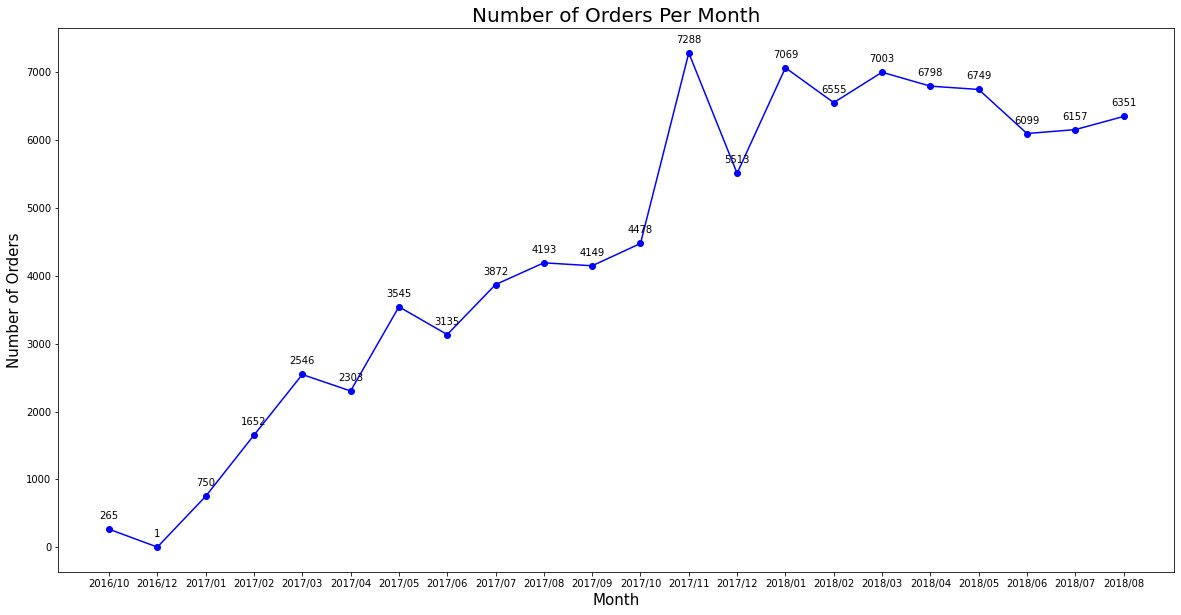

In [ ]:
df_number_of_orders_per_month = df.groupby(['month_order'])['order_id'].count()
plt.figure(figsize=(20,10))
plt.title('Number of Orders Per Month',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel("Number of Orders",fontsize=15)

x = df_number_of_orders_per_month.index
y = df_number_of_orders_per_month.values

# 'bo-' means blue color, round points, solid lines
plt.plot(x,y,'bo-')

# zip joins x and y coordinates in pairs
for x,y in zip(x,y):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

**Insight**


*   Here, we can see that there is an uptrend in the number of orders with a peak of 7059 orders in November 2017.This can happen because in November there is Black Friday, which offers promos for customers to shop for Christmas gifts.

*   The chart tended to increase from 2016 to 2017. However, it was stagnant as it entered 2018. 







### Daily orders trend(which day of week is the busiest)

In [ ]:
df['days'] = df['order_purchase_timestamp'].dt.day_name()
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dot = df.groupby('days')['order_id'].count().reindex(dow)
dot = pd.DataFrame(dot)
dot.reset_index(inplace=True)
dot.columns = ['days','number_of_orders']
dot

,days,number_of_orders
0,Monday,15701
1,Tuesday,15503
2,Wednesday,15074
3,Thursday,14322
4,Friday,13683
5,Saturday,10555
6,Sunday,11633


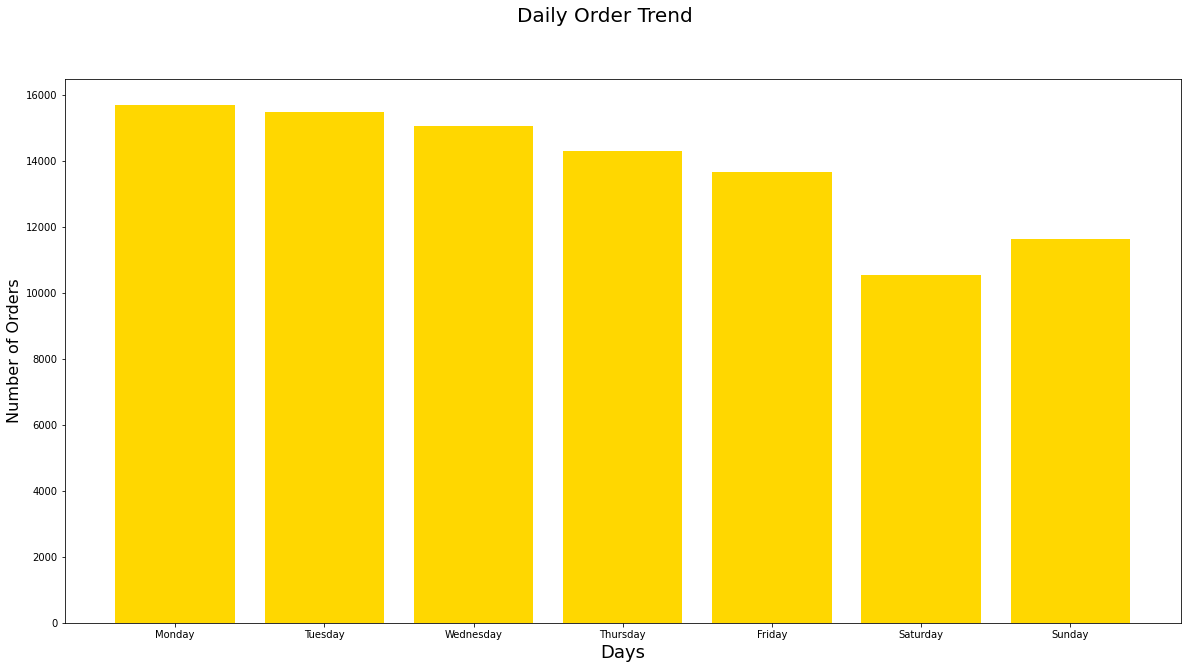

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Daily Order Trend', fontsize=20)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = dot['days']
y = dot['number_of_orders']
plt.bar(x, y, color=['gold'])
plt.show()

**Insight**

*   Monday is the busiest day of the week, which total orders are 15.210

*   Tuesday is the second busiest day of the week.

*   Customers rarely order products on Sunday and Saturday (weekends).

*   The volume of orders decreases as the weekend gets closer.

**Recommendations** 

>Gustavo needs to have product promotions on the days with the most orders, especially on Monday and Tuesday, so that promotions are seen by many customers.

### Percentage of orders per payment type

In [ ]:
opt = df.groupby('payment_type')['order_id'].count()
opt = pd.DataFrame(opt)
opt.reset_index(inplace=True)
opt.columns = ['payment_type','number_of_orders']
opt

,payment_type,number_of_orders
0,boleto,19187
1,credit_card,73218
2,debit_card,1484
3,voucher,2582


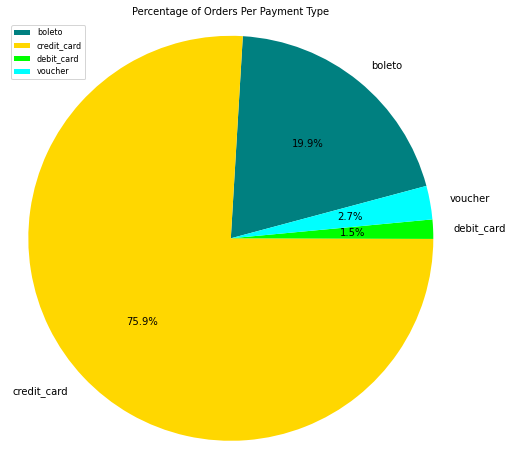

In [ ]:
plt.figure(figsize=(8,8))
data = opt['number_of_orders']
labels = opt['payment_type']
my_colors = ['teal','gold','lime','cyan']
plt.pie(data,labels=labels,autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors)
plt.title('Percentage of Orders Per Payment Type', fontsize=10)
plt.axis('equal')
plt.legend(loc='best', fontsize=8)
plt.show()

**Insight**

*   The payment method most often used by customers is a credit card.

*   Boleto is the second option that customers choose for payment. Brazil has a unique form of payment called a boleto.



### Number of customers per city and per state

In [ ]:
state = df.groupby(['customer_state'])['customer_id'].count()
state = pd.DataFrame(state)
state.reset_index(inplace=True)
state

,customer_state,customer_id
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1279
6,DF,2080
7,ES,1993
8,GO,1957
9,MA,717


In [ ]:
state.sort_values(by='customer_id',ascending=False,inplace=True)
state

,customer_state,customer_id
25,SP,40499
18,RJ,12349
10,MG,11353
22,RS,5345
17,PR,4923
23,SC,3546
4,BA,3256
6,DF,2080
7,ES,1993
8,GO,1957


In [ ]:
city = df.groupby(['customer_city'])['customer_id'].count()
city = pd.DataFrame(city)
city.reset_index(inplace=True)
city

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4080,xinguara,9
4081,xique-xique,3
4082,zacarias,2
4083,ze doca,5


In [ ]:
city.sort_values(by='customer_id',ascending=False,inplace=True)
city

,customer_city,customer_id
3563,sao paulo,15045
3126,rio de janeiro,6600
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489
...,...,...
2924,populina,1
2923,ponto novo,1
2921,ponto do marambaia,1
2920,ponto belo,1


Text(0, 0.5, 'Number of Customers')

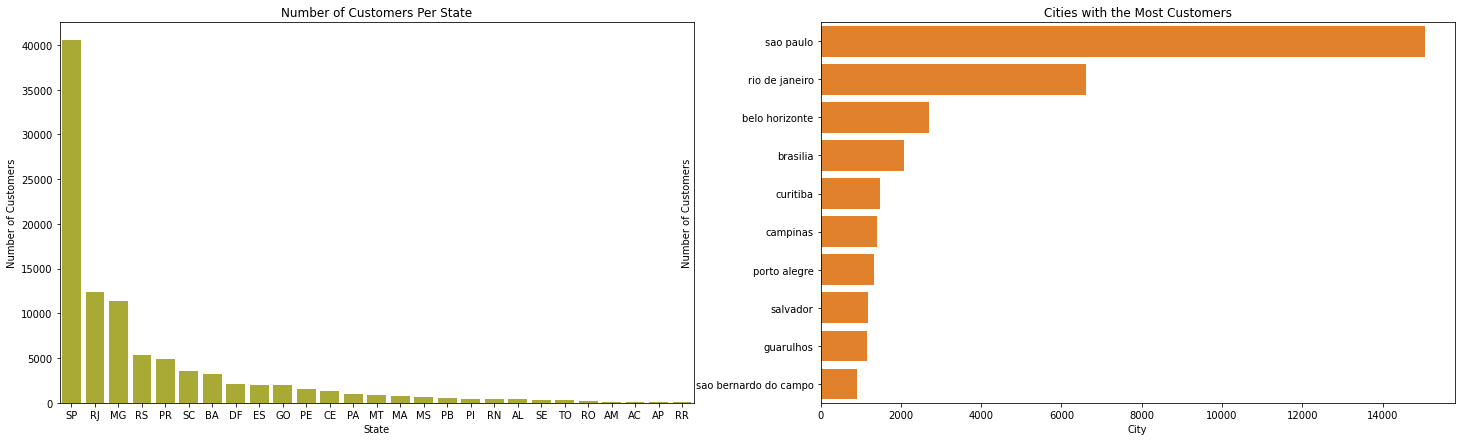

In [ ]:
plt.figure(figsize = (25,7))

plt.subplot(121)
base_color = sns.color_palette()[8]

sns.barplot(data = state.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id', color = base_color)
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.subplot(122)
base_color = sns.color_palette()[1]

sns.barplot(data = city.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city', color = base_color)
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')

**Insight**

> Based on the state and city, it can be seen that Sao Paulo has the largest number of customers. 

**Recommendations:** 


*   Boosting marketing efforts in small-population cities and states.
*   Give customers rewards (discount coupons, rebates, and free delivery for their subsequent purchases) to encourage them to order at Gustavo e-commerce again.






### Count of Orders With Number of Payment Installments

In [ ]:
df_payment_installments = df['payment_installments'].value_counts()
df_payment_installments= pd.DataFrame(df_payment_installments)
df_payment_installments.reset_index(inplace=True)
df_payment_installments

,index,payment_installments
0,1,47193
1,2,11917
2,3,10054
3,4,6824
4,10,5086
5,5,5049
6,8,4098
7,6,3764
8,7,1545
9,9,613


Text(0, 0.5, 'Count of Orders')

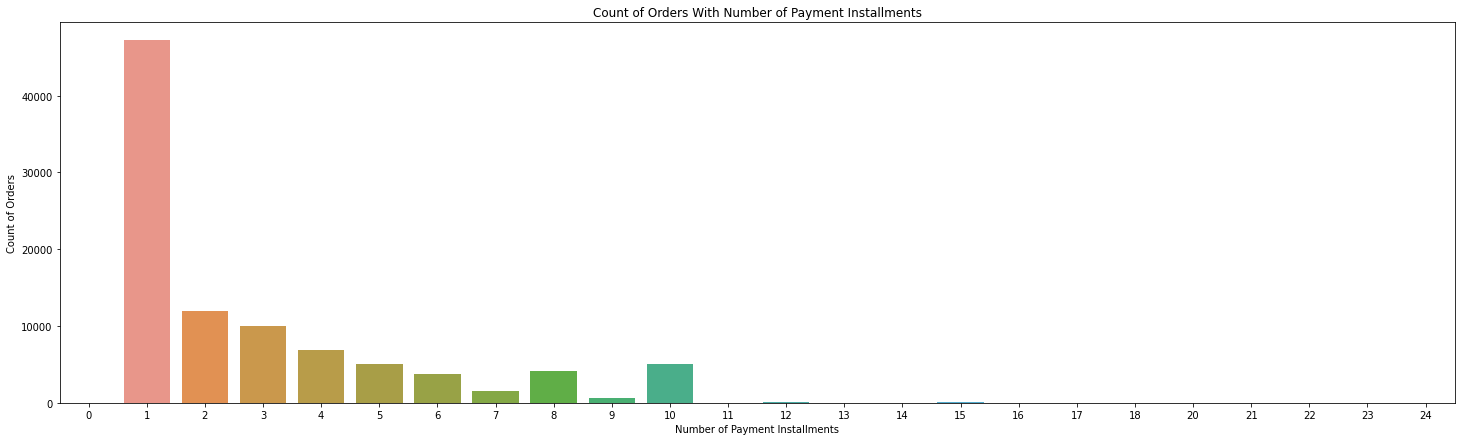

In [ ]:
plt.figure(figsize = (25,7))
sns.barplot(data = df['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments')
plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders')

**Insight**

> Customers tend to have a low number of payment installments with the majority of the customers paying 1 installments only.

### Distribution of Payment Value

In [ ]:
df['payment_value'].describe()

count    96471.000000
mean       156.745693
std        206.591925
min          0.010000
25%         60.000000
50%        103.140000
75%        174.560000
max       4950.340000
Name: payment_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


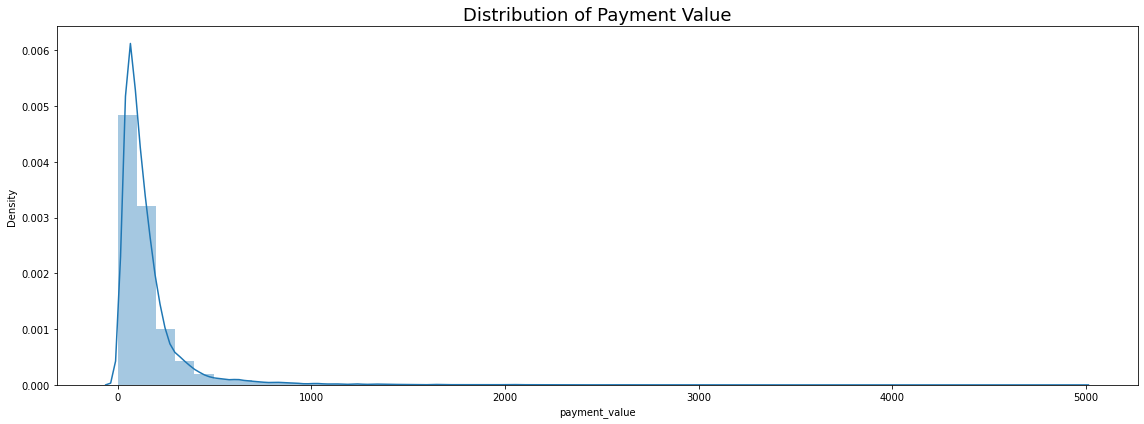

In [ ]:
plt.figure(figsize=(16, 6))
sns.distplot(df['payment_value'])
plt.title('Distribution of Payment Value', fontsize=18)
plt.tight_layout()
plt.show()

**Insight**
> Most payments are under 1000 Brazilian real

### Total and Average payment valuer per city

In [ ]:
# Average payment value per city
top_city_avg = df['payment_value'].groupby(df['customer_state']).mean().sort_values(ascending=False)
top_city_avg = pd.DataFrame(top_city_avg)
top_city_avg.reset_index(inplace=True)
top_city_avg

,customer_state,payment_value
0,PB,258.002940
1,AP,239.330000
2,AC,237.162000
3,AL,232.756096
4,RO,232.364691
5,PA,220.926660
6,RR,220.476098
7,PI,215.591681
8,TO,213.844635
9,SE,207.691493


In [ ]:
# Total payment value per city
top_city_sum = df['payment_value'].groupby(df['customer_state']).sum().sort_values(ascending=False)
top_city_sum = pd.DataFrame(top_city_sum)
top_city_sum.reset_index(inplace=True)
top_city_sum 

,customer_state,payment_value
0,SP,5671132.21
1,RJ,2004816.35
2,MG,1785504.94
3,RS,846573.65
4,PR,770967.23
5,SC,587466.07
6,BA,579450.98
7,DF,339167.86
8,GO,329144.35
9,PE,304684.50


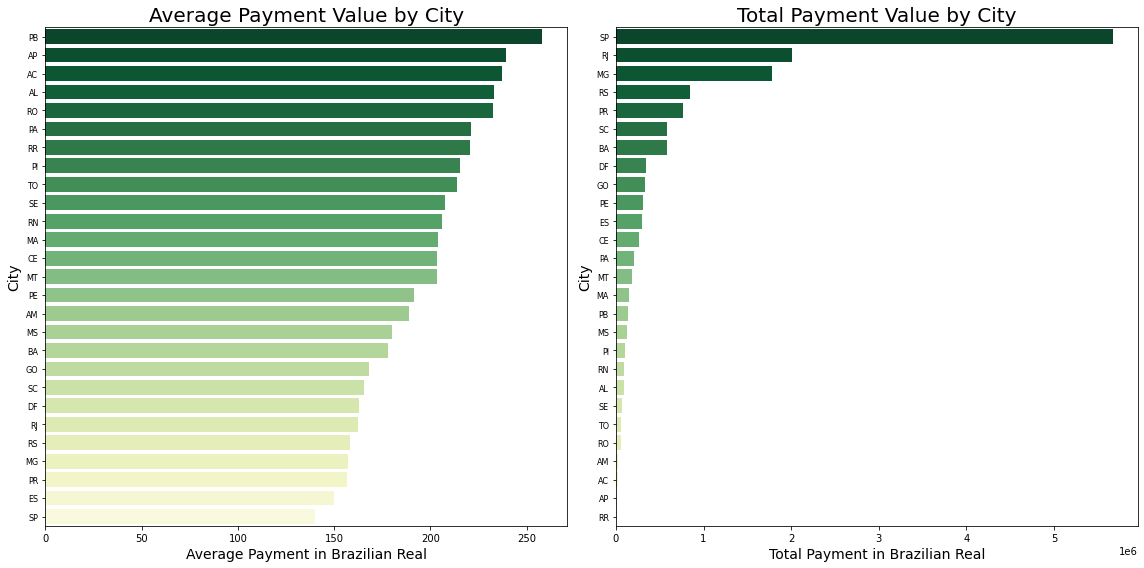

In [ ]:
top_city_avg = df['payment_value'].groupby(df['customer_state']).mean().sort_values(ascending=False)
top_city_sum = df['payment_value'].groupby(df['customer_state']).sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(y=top_city_avg.index, x=top_city_avg.values, palette='YlGn_r')
plt.title('Average Payment Value by City',fontsize=20)
plt.xlabel('Average Payment in Brazilian Real',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.subplot(122)
sns.barplot(y=top_city_sum.index, x=top_city_sum.values, palette='YlGn_r')
plt.title('Total Payment Value by City',fontsize=20)
plt.xlabel('Total Payment in Brazilian Real',fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

**Insight**

*   The city with the highest number of transactions is SP (Sao Paolo), followed by RJ (Rio de Janeiro).

*   But based on the average transaction, SP (Sao Paolo) has the smallest average of only about 150 Brazilian Reals in one order.



# Advance Assignment 

RFM is one of the methods that can be used to segment customers and determine their buyer behavior. The RFM itself has the following meaning:
*   Recency: when is the last time the user takes an action ?
*   Frequency: how many times does the user take this action?
*   Monetary value: what is the sum of monetary value from this user ?

Companies can use RFM to strengthen their marketing tactics, reawaken dormant clients, build customer loyalty, and generate more income.






In [ ]:
df_cluster=df.copy()

In [ ]:
column1 = ['customer_unique_id','order_id','order_purchase_timestamp','payment_value']
df_cluster = df_cluster[(column1)]
df_cluster.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,28.62


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96471 entries, 0 to 96470
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96471 non-null  object        
 1   order_id                  96471 non-null  object        
 2   order_purchase_timestamp  96471 non-null  datetime64[ns]
 3   payment_value             96471 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
max_date = max(df_cluster['order_purchase_timestamp'])
max_date

Timestamp('2018-08-29 15:00:37')

In [ ]:
#Max Time
max_date = max(df_cluster['order_purchase_timestamp'])
df_cluster['diff_days'] = (max_date-df_cluster['order_purchase_timestamp']).dt.days 
#Groupby customer_id
df_customer = df_cluster.groupby('customer_unique_id', as_index=False).agg(
    recency = ('diff_days', 'min'),
    frequency =  ('order_id', lambda x: x.nunique()),
    monetary = ('payment_value', 'sum')
    )

In [ ]:
df_customer.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


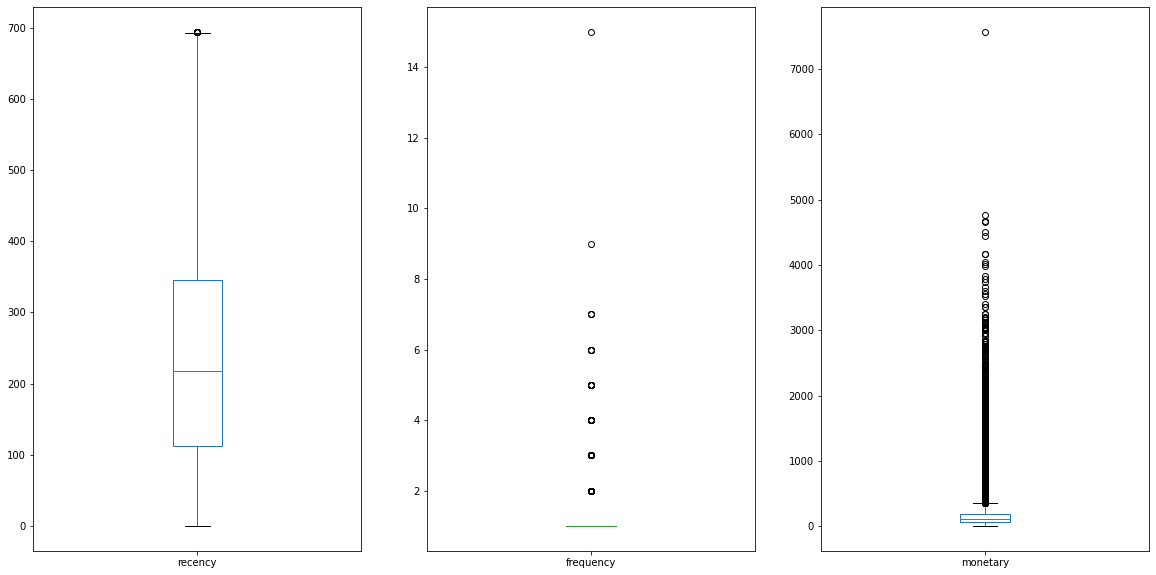

In [ ]:
numerical_column = ['recency','frequency','monetary']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_customer.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


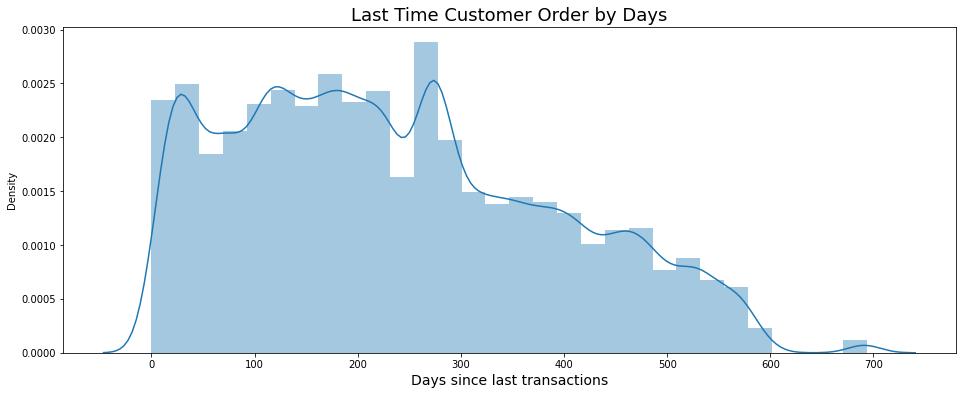

In [ ]:
# Recency distribution
plt.figure(figsize=(16, 6))
sns.distplot(df_customer['recency'], bins=30)
plt.title('Last Time Customer Order by Days', fontsize=18)
plt.xlabel('Days since last transactions', fontsize=14)
plt.show()

In [ ]:
df_customer['recency'].describe()

count    93351.000000
mean       236.933552
std        152.580625
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        694.000000
Name: recency, dtype: float64

Based on the distribution and descriptive statistics of recency

*   The last time the customer made a transaction ranged from 0 days to 694 days.
*   The average customer makes their last transaction in 237 days



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


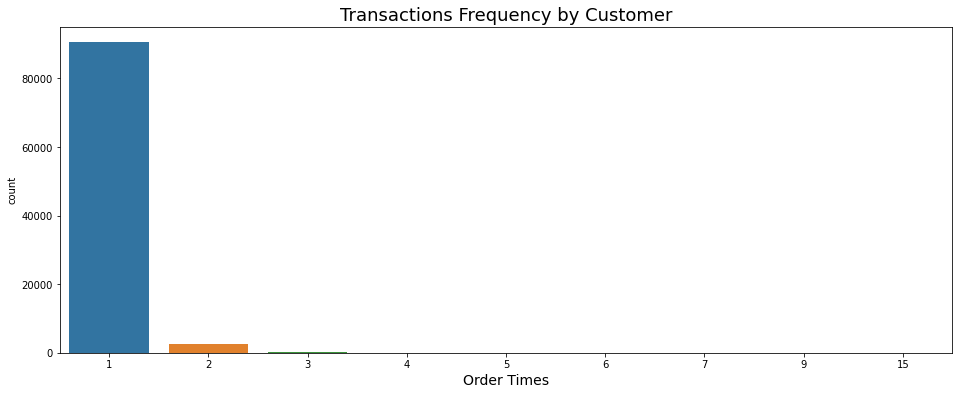

In [ ]:
# Frequency distribution
plt.figure(figsize=(16, 6))
sns.countplot(df_customer['frequency'])
plt.title('Transactions Frequency by Customer', fontsize=18)
plt.xlabel('Order Times', fontsize=14)
plt.show()

In [ ]:
df_customer['frequency'].describe()

count    93351.000000
mean         1.033422
std          0.209105
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

Based on the distribution and descriptive statistics of the frequency : 

*   Each customer most often places an order only 1 times when using this e-commerce. Therefore, it is necessary to increase the number of transactions made by customers by targeting marketing according to their segmentation.
*   The most number of transactions made by a customer is 15 transactions.
*   The number of transactions made by each customer is in the range of 1 to 17 transactions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


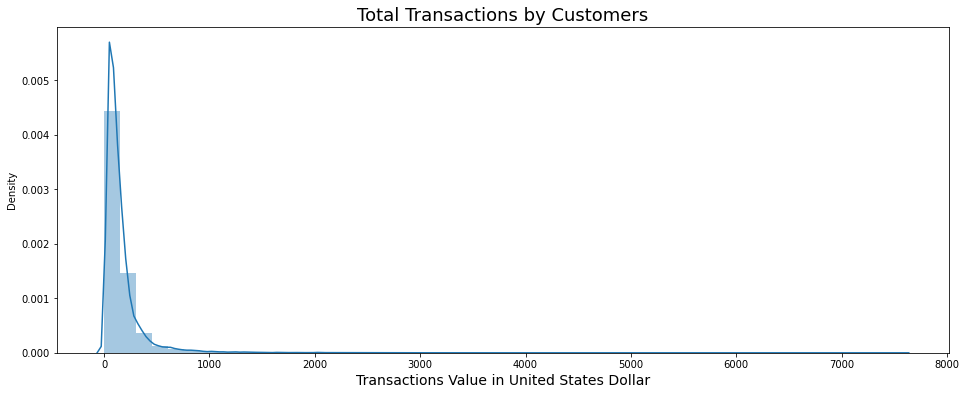

In [ ]:
# Monetary distribution
plt.figure(figsize=(16, 6))
sns.distplot(df_customer['monetary'])
plt.title('Total Transactions by Customers', fontsize=18)
plt.xlabel('Transactions Value in United States Dollar', fontsize=14)
plt.show()

In [ ]:
df_customer['monetary'].describe()

count    93351.000000
mean       161.984486
std        214.085686
min          0.010000
25%         61.320000
50%        106.090000
75%        180.000000
max       7571.630000
Name: monetary, dtype: float64

The total purchases from each customer are around the figure of 0 dollars until 7571 dollars and have an average of 2896 dollars.

We will calculate quartile values for each R, F, M values

In [ ]:
#clean data
RFM_Table=df_customer.copy()

In [ ]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

To calculate the Quantile scores for Recency, Frequency and Monetary.

In [ ]:
def Recency_Score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def Frequency_Monetary_Score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

The resulting table has Recency, Frequency and Monetary columns, along with the quartile for each value

In [ ]:
segmented_rfm = RFM_Table.copy()
segmented_rfm['R'] = segmented_rfm['recency'].apply(Recency_Score, args=('recency',quantiles,))
segmented_rfm['F'] = segmented_rfm['frequency'].apply(Frequency_Monetary_Score, args=('frequency',quantiles,))
segmented_rfm['M'] = segmented_rfm['monetary'].apply(Frequency_Monetary_Score, args=('monetary',quantiles,))
segmented_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,3,1,1
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4


Concatenate the three score columns

In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm.R.map(str)+segmented_rfm.F.map(str)+segmented_rfm.M.map(str)
segmented_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,3,1,1,311
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214


In [ ]:
segmented_rfm['RFM_Score'].unique()

array(['413', '311', '112', '211', '214', '313', '314', '113', '111',
       '213', '312', '114', '411', '414', '212', '412', '244', '443',
       '143', '344', '444', '144', '342', '343', '242', '441', '142',
       '442', '243', '141', '341', '241'], dtype=object)

In [ ]:
#find out best customer
segmented_rfm.loc[segmented_rfm.RFM_Score =='444'].index.values

array([  428,   438,   467,   545,   725,   822,  1069,  1173,  1212,
        1249,  1432,  2054,  2575,  2825,  2939,  2955,  3197,  3273,
        3302,  3570,  3608,  3637,  4002,  4217,  4474,  4515,  4799,
        4899,  5064,  5199,  5235,  5455,  5474,  5961,  6584,  6722,
        6991,  7190,  7254,  7417,  7475,  7758,  7813,  8640,  8876,
        9221,  9223,  9295,  9566,  9605,  9606,  9619,  9842, 10092,
       10213, 10438, 10565, 10620, 10858, 11605, 11734, 11782, 11873,
       11922, 11971, 12122, 12184, 12260, 12508, 12698, 12862, 12902,
       13212, 13223, 13279, 13787, 13827, 13962, 14110, 14115, 14209,
       14331, 14602, 14686, 14875, 15007, 15082, 15134, 15268, 15402,
       15714, 16170, 16473, 16585, 17237, 17268, 17283, 18225, 18376,
       18437, 18468, 18547, 18630, 18686, 18748, 18767, 19159, 19292,
       19659, 19855, 20174, 20950, 20977, 21005, 21263, 21317, 21576,
       21786, 21791, 21870, 21973, 22057, 22509, 22544, 22765, 22927,
       23015, 23367,

In [ ]:
segmentation_map = {
r'[3-4][3-4][3-4]' : 'Champions',
r'[3-4][3-4][1-2]' : 'Potential Loyalist',
r'[3-4][1-2][3-4]' : 'Recent Customers',
r'[1-2][3-4][3-4]' : 'Customers Needing Attention',
r'[3-4][1-2][1-2]' : 'Promising',
r'[1-2][3-4][1-2]' : 'About To Sleep',
r'[1-2][1-2][3-4]' : 'At Risk',
r'[1-2][1-2][1-2]' : 'Lost'
}
segmented_rfm['Segment'] = segmented_rfm['R'].map(str) + segmented_rfm['F'].map(str)+segmented_rfm['M'].map(str)
segmented_rfm['Segment'] = segmented_rfm['Segment'].replace(segmentation_map,regex=True)
segmented_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,3,413,Recent Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,3,1,1,311,Promising
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,Lost
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214,At Risk


In [ ]:
segmented_rfm['Segment'].value_counts()

Lost                           23550
Promising                      22762
Recent Customers               22534
At Risk                        21704
Champions                       1365
Customers Needing Attention     1071
Potential Loyalist               184
About To Sleep                   181
Name: Segment, dtype: int64

In [ ]:
segmented_rfm.groupby('Segment').mean().sort_values('monetary')

,recency,frequency,monetary,R,F,M
Segment,,,,,,
Promising,111.266014,1.000000,61.214189,3.496881,1.0,1.492444
Lost,364.698089,1.000000,61.582384,1.489045,1.0,1.502548
About To Sleep,377.806630,2.044199,77.610773,1.464088,4.0,1.812155
Potential Loyalist,108.630435,2.016304,78.106304,3.527174,4.0,1.793478
Recent Customers,110.986598,1.000000,257.815896,3.501509,1.0,3.485311
At Risk,363.135413,1.000000,258.886871,1.507188,1.0,3.490877
Customers Needing Attention,347.745098,2.084967,332.038123,1.549953,4.0,3.696545
Champions,112.408791,2.158974,340.846322,3.502564,4.0,3.734066


In [ ]:
customer_segment = segmented_rfm.groupby('Segment').agg({'recency':['count','mean'],'frequency':['mean','min','max'],'monetary':'mean'})
customer_segment.reset_index(inplace=True)
customer_segment

Segment recency             frequency          \
                                 count        mean      mean min max   
0               About To Sleep     181  377.806630  2.044199   2   4   
1                      At Risk   21704  363.135413  1.000000   1   1   
2                    Champions    1365  112.408791  2.158974   2  15   
3  Customers Needing Attention    1071  347.745098  2.084967   2   6   
4                         Lost   23550  364.698089  1.000000   1   1   
5           Potential Loyalist     184  108.630435  2.016304   2   3   
6                    Promising   22762  111.266014  1.000000   1   1   
7             Recent Customers   22534  110.986598  1.000000   1   1   

     monetary  
         mean  
0   77.610773  
1  258.886871  
2  340.846322  
3  332.038123  
4   61.582384  
5   78.106304  
6   61.214189  
7  257.815896

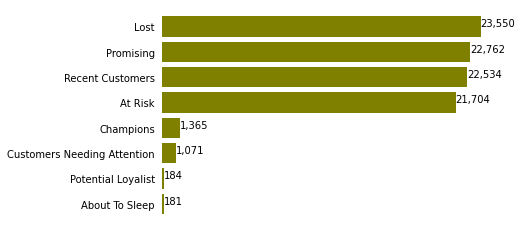

In [ ]:
def segmentation_plot(segment):
    seg_counts = segment.value_counts().sort_values(ascending=True)
    fig, ax = plt.subplots()

    bars = ax.barh(range(len(seg_counts)), seg_counts, color='olive')
    ax.set_frame_on(False)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.set_yticks(range(len(seg_counts)))
    ax.set_yticklabels(seg_counts.index)
    
    for i,bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,bar.get_y() + bar.get_height()/2, '{:,}'.format(int(value)))
    
segmentation_plot(segmented_rfm['Segment'])

**INSIGHT**

> Segment : **Lost**

> Activity : Lowest recency, frequency and monetary scores

> Actionable : Revive interest with reach out campaign, ignore otherwise

> Segment : **Champions**

> Activity : Bought recently, buy often and spend the most

> Actionable : Reward them. They can be early adopters for new products. It will promote your brand.

> Segment : **Promising**

> Activity : Recent shoppers, but haven’t spent much.

> Actionable :Create brand awareness, offer free trials

> Segment : **Customers Needing Attention**

> Activity : Above average recency, frequency and monetary values. May not have bought very recently though

> Actionable : Make limited time offers, recommend based on past purchases, reactivate them.

> Segment : **At Risk**

> Activity : Spent big money and purchased often. But long time ago. Need to bring them back!

> Actionable : Send personalized emails to reconnect, offer renewals, provide helpful resources.

> Segment : **Recent Customers**

> Activity : Bought most recently, but not often.

> Actionable : Provide on-boarding support, give them early success, start building relationship.

> Segment : **Potential Loyalist**

> Activity : Recent customers, but spent a good amount and bought more than once.

> Actionable : Offer membership / loyalty program, recommend other products.

> Segment : **About To Sleep**

> Activity : Below average recency, frequency and monetary values. Will lose them if not reactivated.

> Actionable : Share valuable resources, recommend popular products / renewals at discount, reconnect with them.



